Vamos a realizar el primer modelo para la VR casual

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [2]:
df = pd.read_pickle("datos/casual_cod.pkl")
df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual
0,2018-01-01,0.306137,0.856346,0.17643,1.724547,2.000000,1.025802,0.746165,14.110847,80.5833,10.749882,331
1,2018-01-02,0.306137,0.856346,0.17643,0.992329,1.369596,0.992329,0.746165,14.902598,69.6087,16.652113,131
2,2018-01-03,0.306137,0.856346,0.17643,0.992329,0.929568,0.992329,1.156206,8.050924,43.7273,16.636703,120
3,2018-01-04,0.306137,0.856346,0.17643,0.992329,0.876569,0.992329,1.156206,8.200000,59.0435,10.739832,108
4,2018-01-05,0.306137,0.856346,0.17643,0.992329,0.749651,0.992329,1.156206,9.305237,43.6957,12.522300,82


In [7]:
df.shape

(730, 12)

In [5]:

X1 = df.drop(["casual", "date"], axis = 1)
y1 = df["casual"]
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)


In [6]:
arbol = DecisionTreeRegressor(random_state =0)
arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# fig = plt.figure(figsize = (10,6))
# tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
# plt.show()

In [8]:
max_features = np.sqrt(len(x_train.columns))
max_features

3.1622776601683795

In [9]:
print(arbol.tree_.max_depth)

19


In [10]:
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [11]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [12]:

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,228.267123,123340.746575,351.199013,0.743267,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I


In [13]:
param = {"max_depth": [2,4,6,8,10], 
        "max_features": [1,2,3,4],  
        "min_samples_split": [10,50,100],
        "min_samples_leaf": [10,50,100]} 

In [14]:

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error")

In [15]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [16]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=10, max_features=4, min_samples_leaf=10,
                      min_samples_split=10)

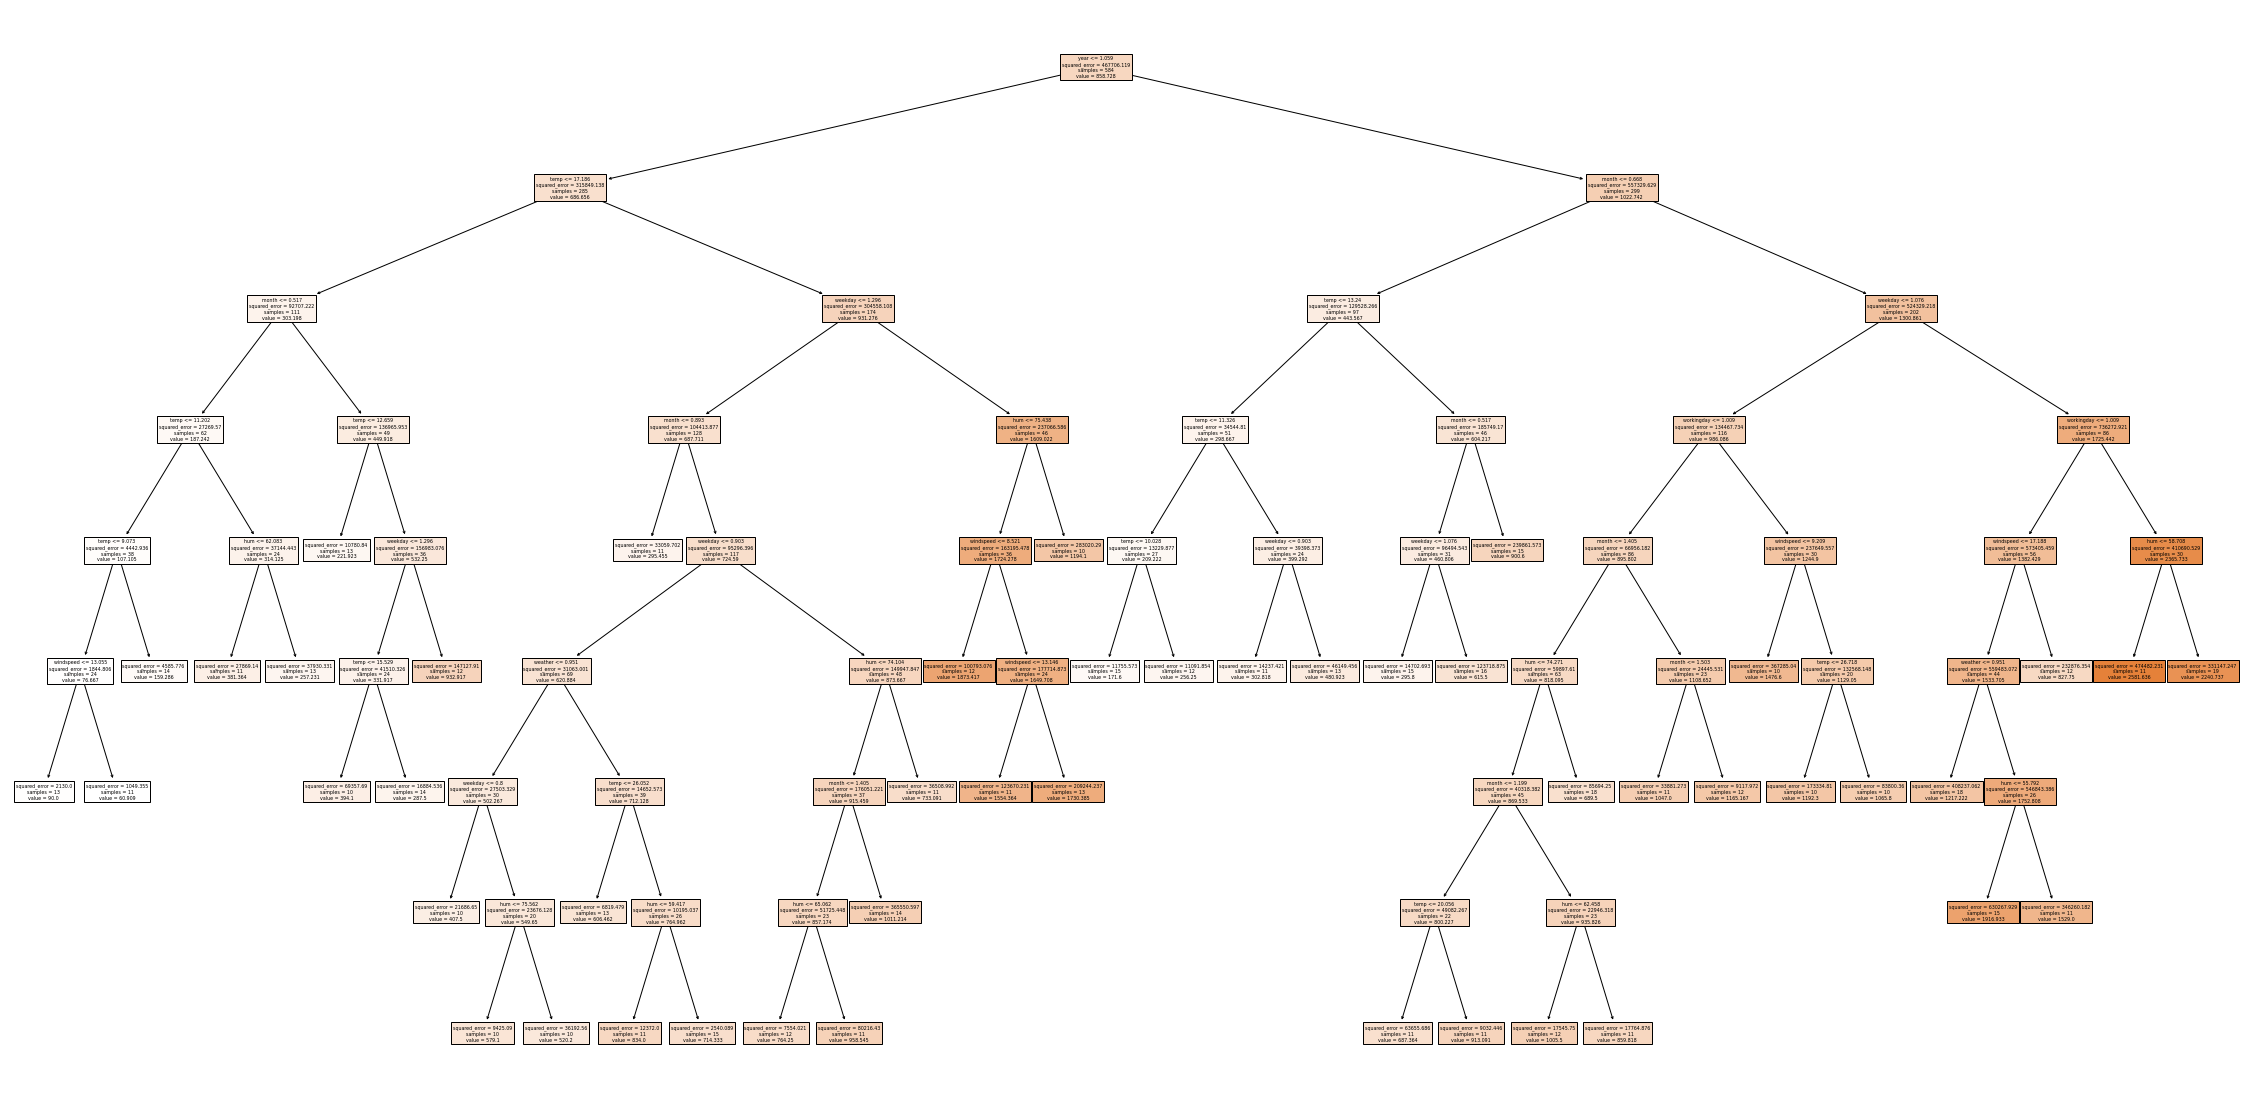

In [17]:
fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True);

In [18]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [19]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,247.089417,146002.698939,382.102995,0.696096,test,Decision tree II
1,224.479929,121414.294733,348.445541,0.740405,train,Decision tree II


In [20]:

df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,228.267123,123340.746575,351.199013,0.743267,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,247.089417,146002.698939,382.102995,0.696096,test,Decision tree II
1,224.479929,121414.294733,348.445541,0.740405,train,Decision tree II


In [21]:
param_prueba2 = {"max_depth": [6,8,10], 
        "max_features": [1,2,3,4],  
        "min_samples_split": [5,10,15],
        "min_samples_leaf": [5,10,15]} 

In [22]:
gs2 = GridSearchCV(
            estimator=DecisionTreeRegressor(), # tipo de modelo que queremos hacer
            param_grid= param_prueba2, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error")

In [23]:
gs2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 8, 10], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [24]:
mejor_modelo2 = gs2.best_estimator_
mejor_modelo2

DecisionTreeRegressor(max_depth=8, max_features=4, min_samples_leaf=5,
                      min_samples_split=15)

In [25]:
y_pred_test_dt3 = mejor_modelo2.predict(x_test)
y_pred_train_dt3 = mejor_modelo2.predict(x_train)

In [26]:
dt_results3 = metricas(y_test, y_train, y_pred_test_dt3, y_pred_train_dt3, "Decision tree III")
dt_results3

,MAE,MSE,RMSE,R2,set,modelo
0,248.484747,150820.921251,388.356693,0.686067,test,Decision tree III
1,206.755612,94599.807191,307.570817,0.797737,train,Decision tree III


In [27]:
df_decision_results3 = pd.concat([df_decision_results, dt_results3], axis = 0)
df_decision_results3

,MAE,MSE,RMSE,R2,set,modelo
0,228.267123,123340.746575,351.199013,0.743267,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,247.089417,146002.698939,382.102995,0.696096,test,Decision tree II
1,224.479929,121414.294733,348.445541,0.740405,train,Decision tree II
0,248.484747,150820.921251,388.356693,0.686067,test,Decision tree III
1,206.755612,94599.807191,307.570817,0.797737,train,Decision tree III
